In [ ]:
!nvidia-smi

Tue Nov 28 05:16:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 線性函數
- y = w*x + b

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data
# y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]

In [ ]:
!pip install wget
import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=b52cdf87689e616d63712d1b28bb602c77b2f0d352d1b3d330e6c088a0d4d532
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

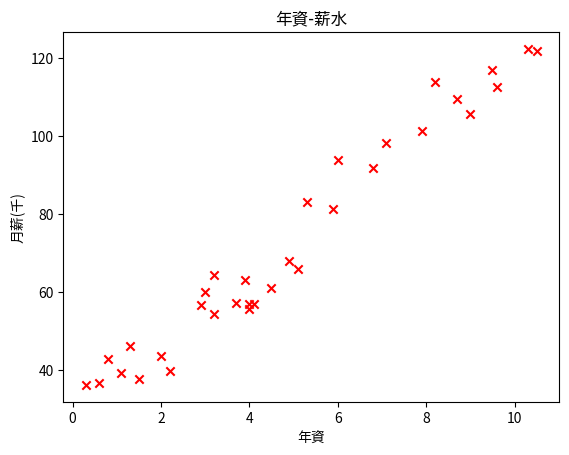

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.scatter(x, y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪(千)")
plt.show()

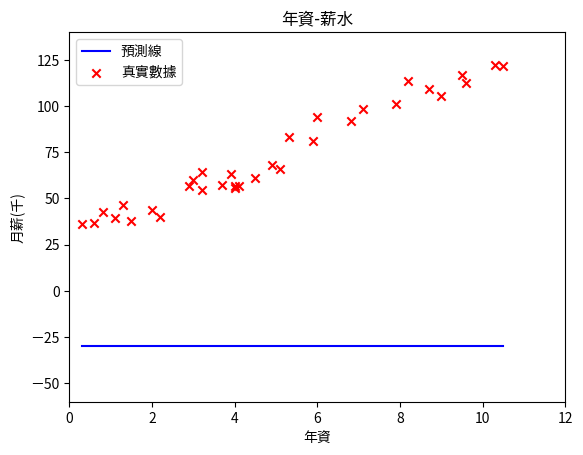

In [ ]:
def plot_pred(w, b):
  y_pred = x*w + b
  plt.plot(x, y_pred, color="blue", label="預測線")
  plt.scatter(x, y, marker="x", color="red", label="真實數據")
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪(千)")
  plt.xlim([0, 12])
  plt.ylim([-60, 140])
  plt.legend()
  plt.show()

plot_pred(0, -30)

In [ ]:
#互動元件
from ipywidgets import interact

interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

## Cost fuction

In [ ]:
w = 10
b = 0
y_pred = w*x + b
cost = (y - y_pred)**2
cost.sum() / len(x)

602.547878787879

In [ ]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

compute_cost(x, y, 10, 10)

227.88121212121214

In [ ]:
# b=0 w=-100~100 cost會是多少

costs = []
for w in range(-100, 101):
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

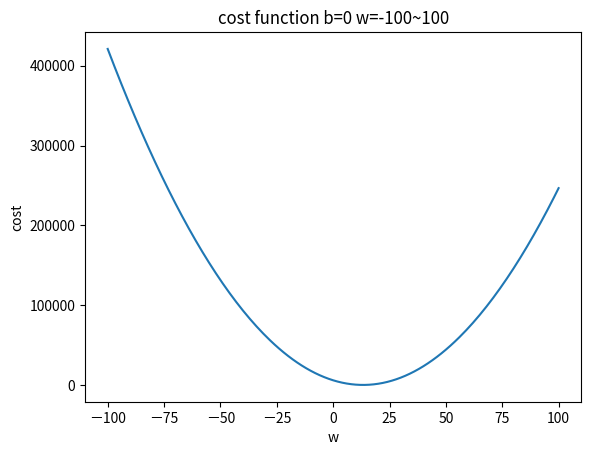

In [ ]:
import matplotlib.pyplot as plt

# plt.scatter(range(-100, 101), costs)
plt.plot(range(-100, 101), costs)
plt.title("cost function b=0 w=-100~100")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

In [ ]:
# w=-100~100 b=-100~100 的 cost
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

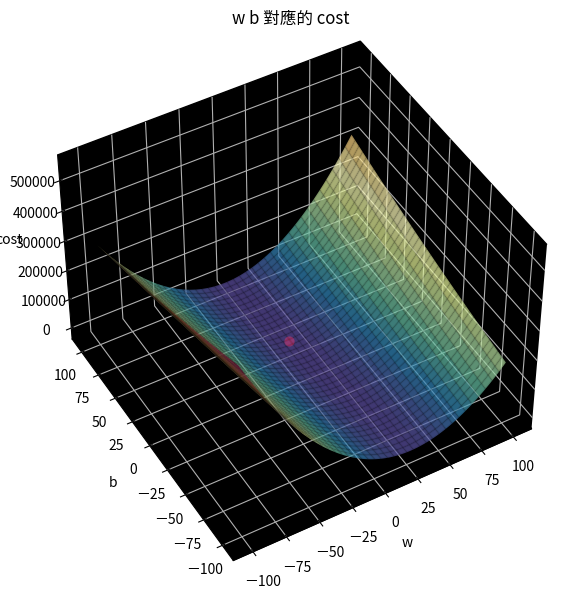

當w=[9], b=[29] 會有最小cost:[32.69484848]


In [ ]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))  #調整圖片大小
ax = plt.axes(projection="3d")
ax.view_init(45, -120)  #旋轉視圖
ax.xaxis.set_pane_color((0, 0, 0))  #將網底設成白色
ax.yaxis.set_pane_color((0, 0, 0))
ax.zaxis.set_pane_color((0, 0, 0))

b_grid, w_grid = np.meshgrid(bs, ws)  #二維網格
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1)  #加邊框

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

#找出最低cost的位置
w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)  #畫出cost最小的點

plt.show()

print(f"當w={ws[w_index]}, b={bs[b_index]} 會有最小cost:{costs[w_index, b_index]}")

## 梯度下降
- Gradient decsent

In [ ]:
def compute_gradient(x, y, w, b):
  w_gradient = (x*(w*x+b -y)).mean() #把cost function對w做微分
  b_gradient = (w*x+b -y).mean()  #把cost function對b做微分
  return w_gradient, b_gradient

In [ ]:
compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.084848484848486)

In [ ]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [ ]:
# w = 0
# b = 0
# learning_rate = 0.001  #省略上方計算斜率時的*2省略，透過學習率控制即可(就算乘以二結果也相同)

def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):  #更新次數
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    # w, b
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0 :  #每一千次才印出來
      # :.2f 只顯示小數點後兩位，:3 占用三格， :.2e 用科學符號表示(前方多一個空格可以容納負號，讓格式一致)
      print(f"Iteration {i:4} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [ ]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3  #1.0乘以十的負三次方= 0.001
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration    0 : Cost  5.6568e+03, w:  4.36e-01, b:  7.26e-02, w_gradient: -4.36e+02, b_gradient: -7.26e+01
Iteration 1000 : Cost  1.4097e+02, w:  1.21e+01, b:  8.07e+00, w_gradient:  8.00e-01, b_gradient: -5.32e+00
Iteration 2000 : Cost  9.6063e+01, w:  1.14e+01, b:  1.27e+01, w_gradient:  6.12e-01, b_gradient: -4.08e+00
Iteration 3000 : Cost  6.9732e+01, w:  1.09e+01, b:  1.63e+01, w_gradient:  4.69e-01, b_gradient: -3.12e+00
Iteration 4000 : Cost  5.4293e+01, w:  1.05e+01, b:  1.91e+01, w_gradient:  3.59e-01, b_gradient: -2.39e+00
Iteration 5000 : Cost  4.5241e+01, w:  1.02e+01, b:  2.12e+01, w_gradient:  2.75e-01, b_gradient: -1.83e+00
Iteration 6000 : Cost  3.9933e+01, w:  9.91e+00, b:  2.28e+01, w_gradient:  2.10e-01, b_gradient: -1.40e+00
Iteration 7000 : Cost  3.6821e+01, w:  9.73e+00, b:  2.40e+01, w_gradient:  1.61e-01, b_gradient: -1.07e+00
Iteration 8000 : Cost  3.4996e+01, w:  9.59e+00, b:  2.49e+01, w_gradient:  1.23e-01, b_gradient: -8.22e-01
Iteration 9000 : Cost  3.392

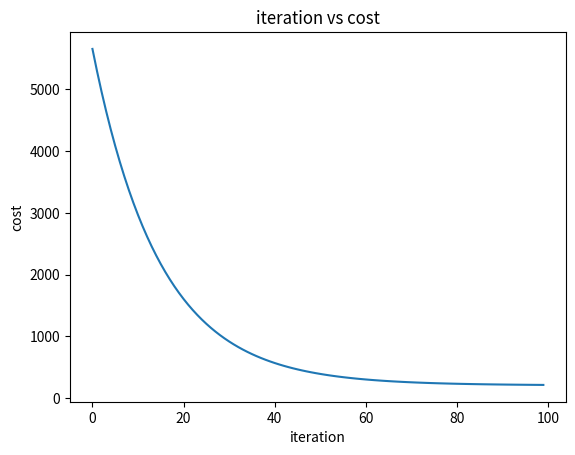

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,100), c_hist[:100])  #畫出前100筆資料
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [ ]:
print(f'最終 w, b = ({w_final:.2f} {b_final:.2f})')

最終 w, b = (9.14 27.89)


In [ ]:
print(f"年資3.5  預測薪水: {w_final*3.5 + b_final:.1f}K")
print(f"年資5.9  預測薪水: {w_final*5.9 + b_final:.1f}K")

年資3.5  預測薪水: 59.9K
年資5.9  預測薪水: 81.8K


In [ ]:
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

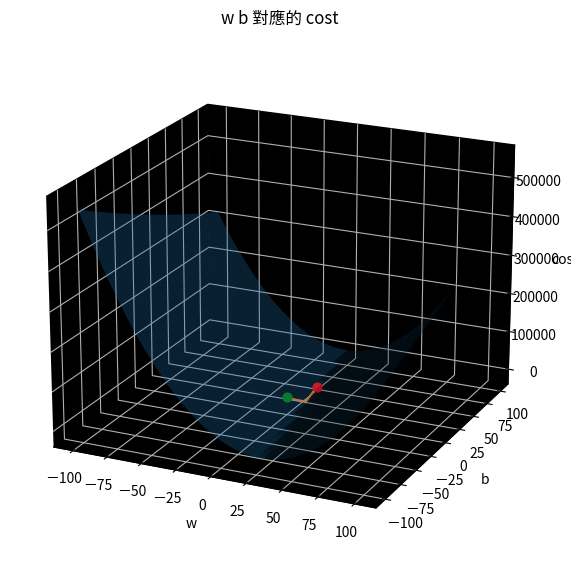

In [ ]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((0, 0, 0))
ax.yaxis.set_pane_color((0, 0, 0))
ax.zaxis.set_pane_color((0, 0, 0))

b_grid, w_grid = np.meshgrid(bs, ws)

ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()